<a href="https://colab.research.google.com/github/Rezaa13/California-housing-price-prediction/blob/main/California_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
housing_pd=pd.read_csv('/content/drive/MyDrive/California/housing.csv')
housing_pd.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#Goal is to build predective model


In [ ]:
housing_pd_shuffeled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffeled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [ ]:
pd.get_dummies(housing_pd_shuffeled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [ ]:
housing_pd_shuffeled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [ ]:
housing_pd_final= pd.concat([housing_pd_shuffeled.drop('ocean_proximity', axis=1),
                            pd.get_dummies(housing_pd_shuffeled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [ ]:
housing_pd_final = housing_pd_final[['longitude',	'latitude','housing_median_age',
                                     'total_rooms', 'total_bedrooms','population','households',
                                     'median_income',	'<1H OCEAN',	'INLAND',	'ISLAND',	'NEAR BAY',	'NEAR OCEAN','median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [ ]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [ ]:
# splitting the data for train, test, validation


In [ ]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [ ]:
#train the training set into X Y axis
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, :-1]
x_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, :-1]
x_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, :-1]

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((18000, 13), (18000, 13), (1218, 13), (1218, 13), (1217, 13), (1217, 13))

In [ ]:
#skalleing / preprocessing the data for every data except categorical (mean 1-7)

from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(x_train[:, :8])

def preprocessor(x):
 A = np.copy(x)
 A[:, :8] = scaler.transform(A[:, :8])
 return A

x_train_preprocessed = preprocessor(x_train)
x_train_preprocessed


array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
pd.DataFrame(x_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.728191,-0.815647,0.423168,-0.057912,0.134325,0.111802,0.120643,-0.349320,1.0,0.0,0.0,0.0,0.0
17996,-0.459404,0.785191,1.298057,-0.368023,-0.277849,-0.015390,-0.241986,-0.956265,0.0,1.0,0.0,0.0,0.0
17997,0.593464,-0.731392,-0.610792,0.468908,0.996794,0.077354,1.027213,-0.165155,1.0,0.0,0.0,0.0,0.0
17998,1.127382,-0.731392,0.900380,0.139013,0.463112,0.531359,0.464877,-0.923784,0.0,1.0,0.0,0.0,0.0


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

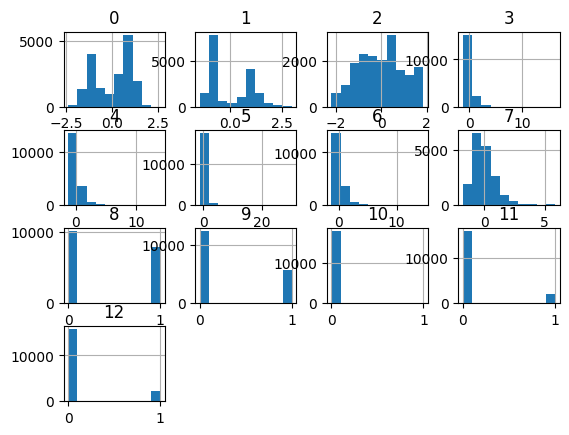

In [ ]:
pd.DataFrame(x_train_preprocessed).hist()

<Axes: >

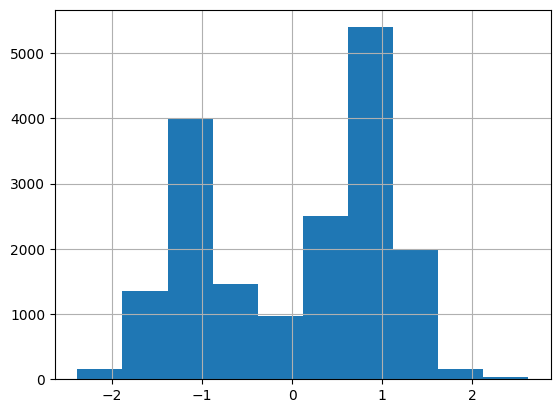

In [ ]:
pd.DataFrame(x_train_preprocessed)[0].hist()

In [ ]:
pd.DataFrame(x_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


In [ ]:
x_train, x_val, x_test = preprocessor(x_train), preprocessor(x_val), preprocessor(x_test)

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [ ]:
# making some models
# sum(y_hat(x)//error - y )^2// y / n real value


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)
mse(lm.predict(x_train), y_train, squared=False), mse(lm.predict(x_val), y_val, squared=False)

(2.994852614185564e-13, 2.9593071961182187e-13)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared=False), mse(knn.predict(x_val), y_val, squared=False)

(0.0, 48.09527651496231)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared=False), mse(knn.predict(x_val), y_val, squared=False)

(25.70733547416015, 42.82335325712599)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=7).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared=False), mse(knn.predict(x_val), y_val, squared=False)

(39.825663211676925, 40.69013029843764)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared=False), mse(knn.predict(x_val), y_val, squared=False)

(43.85851900985751, 42.543973918436784)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=6).fit(x_train, y_train)
mse(rfr.predict(x_train), y_train, squared=False), mse(rfr.predict(x_val), y_val, squared=False)

(43.012289795975676, 44.183895546483456)

In [ ]:
#from sklearn.ensemble import GradientBoostingRegressor

#gbr = GradientBoostingRegressor(n_estimators=10).fit(x_train, y_train)
#mse(gbr.predict(x_train), y_train, squared=False), mse(gbr.predict(x_val), y_val, squared=False)

In [ ]:
#we will use 3 different newral networks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('model/simple_nn', save_best_only=True)
simple_nn.compile(optimizer = opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=x_train, y=y_train, validation_data = (x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 3ms/step - loss: 999926.6875 - root_mean_squared_error: 999.9639 - val_loss: 983315.3125 - val_root_mean_squared_error: 991.6226
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 975684.1250 - root_mean_squared_error: 987.7673 - val_loss: 983176.6250 - val_root_mean_squared_error: 991.5526
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 975635.3125 - root_mean_squared_error: 987.7427 - val_loss: 983173.4375 - val_root_mean_squared_error: 991.5512
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 975634.5625 - root_mean_squared_error: 987.7421 - val_loss: 983173.1250 - val_root_mean_squared_error: 991.5510
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 975633.6250 - root_mean_squared_error: 987.7418 - val_loss: 983173.1250 - val_root_mean_squared_error: 991.5510
Epoch 6/100
563/563 [==============================] - 1s 2ms/ste

In [ ]:
#from tensorflow.keras.models import load_model

#simple_nn = load_model('model/simple_nn')
#mse(simple_nn.predict(x_train), y_train, squared=False), mse(simple_nn.predict(x_val), y_val, squared=False)

563/563 [==============================] - 1s 1ms/step


ValueError: y_true and y_pred have different number of output (1!=13)

In [ ]:
midium_nn = Sequential()
midium_nn.add(InputLayer((13,)))
midium_nn.add(Dense(32,'relu'))
midium_nn.add(Dense(16,'relu'))
midium_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('model/midium_nn', save_best_only=True)
midium_nn.compile(optimizer = opt, loss='mse', metrics=[RootMeanSquaredError()])
midium_nn.fit(x=x_train, y=y_train, validation_data = (x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 4s 6ms/step - loss: 980824.7500 - root_mean_squared_error: 990.3663 - val_loss: 983177.6875 - val_root_mean_squared_error: 991.5532
Epoch 2/100
563/563 [==============================] - 5s 9ms/step - loss: 975636.6875 - root_mean_squared_error: 987.7435 - val_loss: 983174.1250 - val_root_mean_squared_error: 991.5515
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 975898.3750 - root_mean_squared_error: 987.8759 - val_loss: 983428.6250 - val_root_mean_squared_error: 991.6797
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 975663.8750 - root_mean_squared_error: 987.7567 - val_loss: 983175.5625 - val_root_mean_squared_error: 991.5522
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 976212.8750 - root_mean_squared_error: 988.0349 - val_loss: 983176.7500 - val_root_mean_squared_error: 991.5527
Epoch 6/100
563/563 [==============================] - 1s 2ms/ste

In [67]:
mse(rfr.predict(x_test), y_test, squared=False)

47.28356298140416